In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error, 
    r2_score, 
    mean_absolute_error, 
    explained_variance_score
)


In [80]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
118,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
119,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
120,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [81]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [82]:
df['Classes  '] = df['Classes  '].str.strip()
df['Classes  '] = df['Classes  '].replace({'not fire': 0, 'fire': 1})

In [83]:
for col in df.columns:
    if col!='year':
        df[col] = pd.to_numeric(df[col])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   year         122 non-null    int64  
 3   Temperature  122 non-null    int64  
 4    RH          122 non-null    int64  
 5    Ws          122 non-null    int64  
 6   Rain         122 non-null    float64
 7   FFMC         122 non-null    float64
 8   DMC          122 non-null    float64
 9   DC           122 non-null    float64
 10  ISI          122 non-null    float64
 11  BUI          122 non-null    float64
 12  FWI          122 non-null    float64
 13  Classes      122 non-null    int64  
dtypes: float64(7), int64(7)
memory usage: 13.5 KB


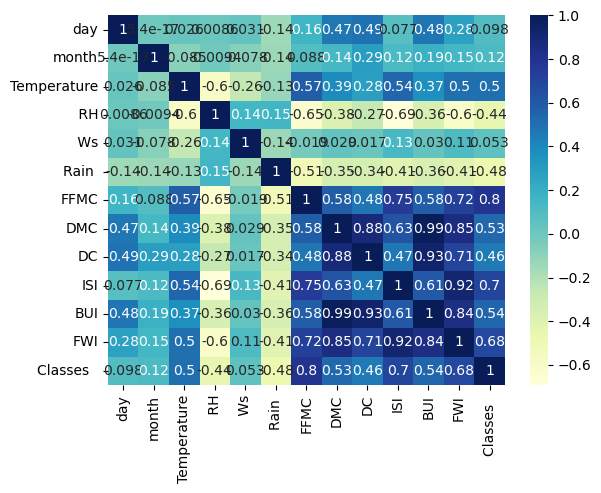

In [85]:
df = df.drop(columns = ['year'])
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

In [86]:
df.head()


,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,0
1,2,6,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,0
2,3,6,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,0
3,4,6,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,0
4,5,6,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          122 non-null    int64  
 1   month        122 non-null    int64  
 2   Temperature  122 non-null    int64  
 3    RH          122 non-null    int64  
 4    Ws          122 non-null    int64  
 5   Rain         122 non-null    float64
 6   FFMC         122 non-null    float64
 7   DMC          122 non-null    float64
 8   DC           122 non-null    float64
 9   ISI          122 non-null    float64
 10  BUI          122 non-null    float64
 11  FWI          122 non-null    float64
 12  Classes      122 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 12.5 KB


In [88]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,15.754098,7.500000,33.163934,55.901639,15.008197,0.678689,81.102459,17.031967,45.415574,5.863934,17.920492,8.520492,0.647541
std,8.843274,1.115259,3.675608,15.716186,2.692186,1.486759,12.244064,12.995068,42.927562,4.803667,13.870785,8.137424,0.479706
min,1.000000,6.000000,24.000000,21.000000,6.000000,0.000000,37.900000,0.900000,7.300000,0.100000,1.400000,0.000000,0.000000
25%,8.000000,7.000000,30.000000,43.250000,14.000000,0.000000,77.650000,7.325000,14.700000,1.825000,7.400000,0.925000,0.000000
50%,16.000000,7.500000,34.000000,56.000000,15.000000,0.000000,84.850000,13.150000,31.500000,4.600000,13.900000,6.050000,1.000000
75%,23.000000,8.000000,36.000000,66.750000,16.750000,0.475000,89.275000,22.900000,56.975000,8.625000,23.875000,13.650000,1.000000
max,31.000000,9.000000,42.000000,90.000000,29.000000,8.700000,96.000000,65.900000,177.300000,19.000000,68.000000,31.100000,1.000000


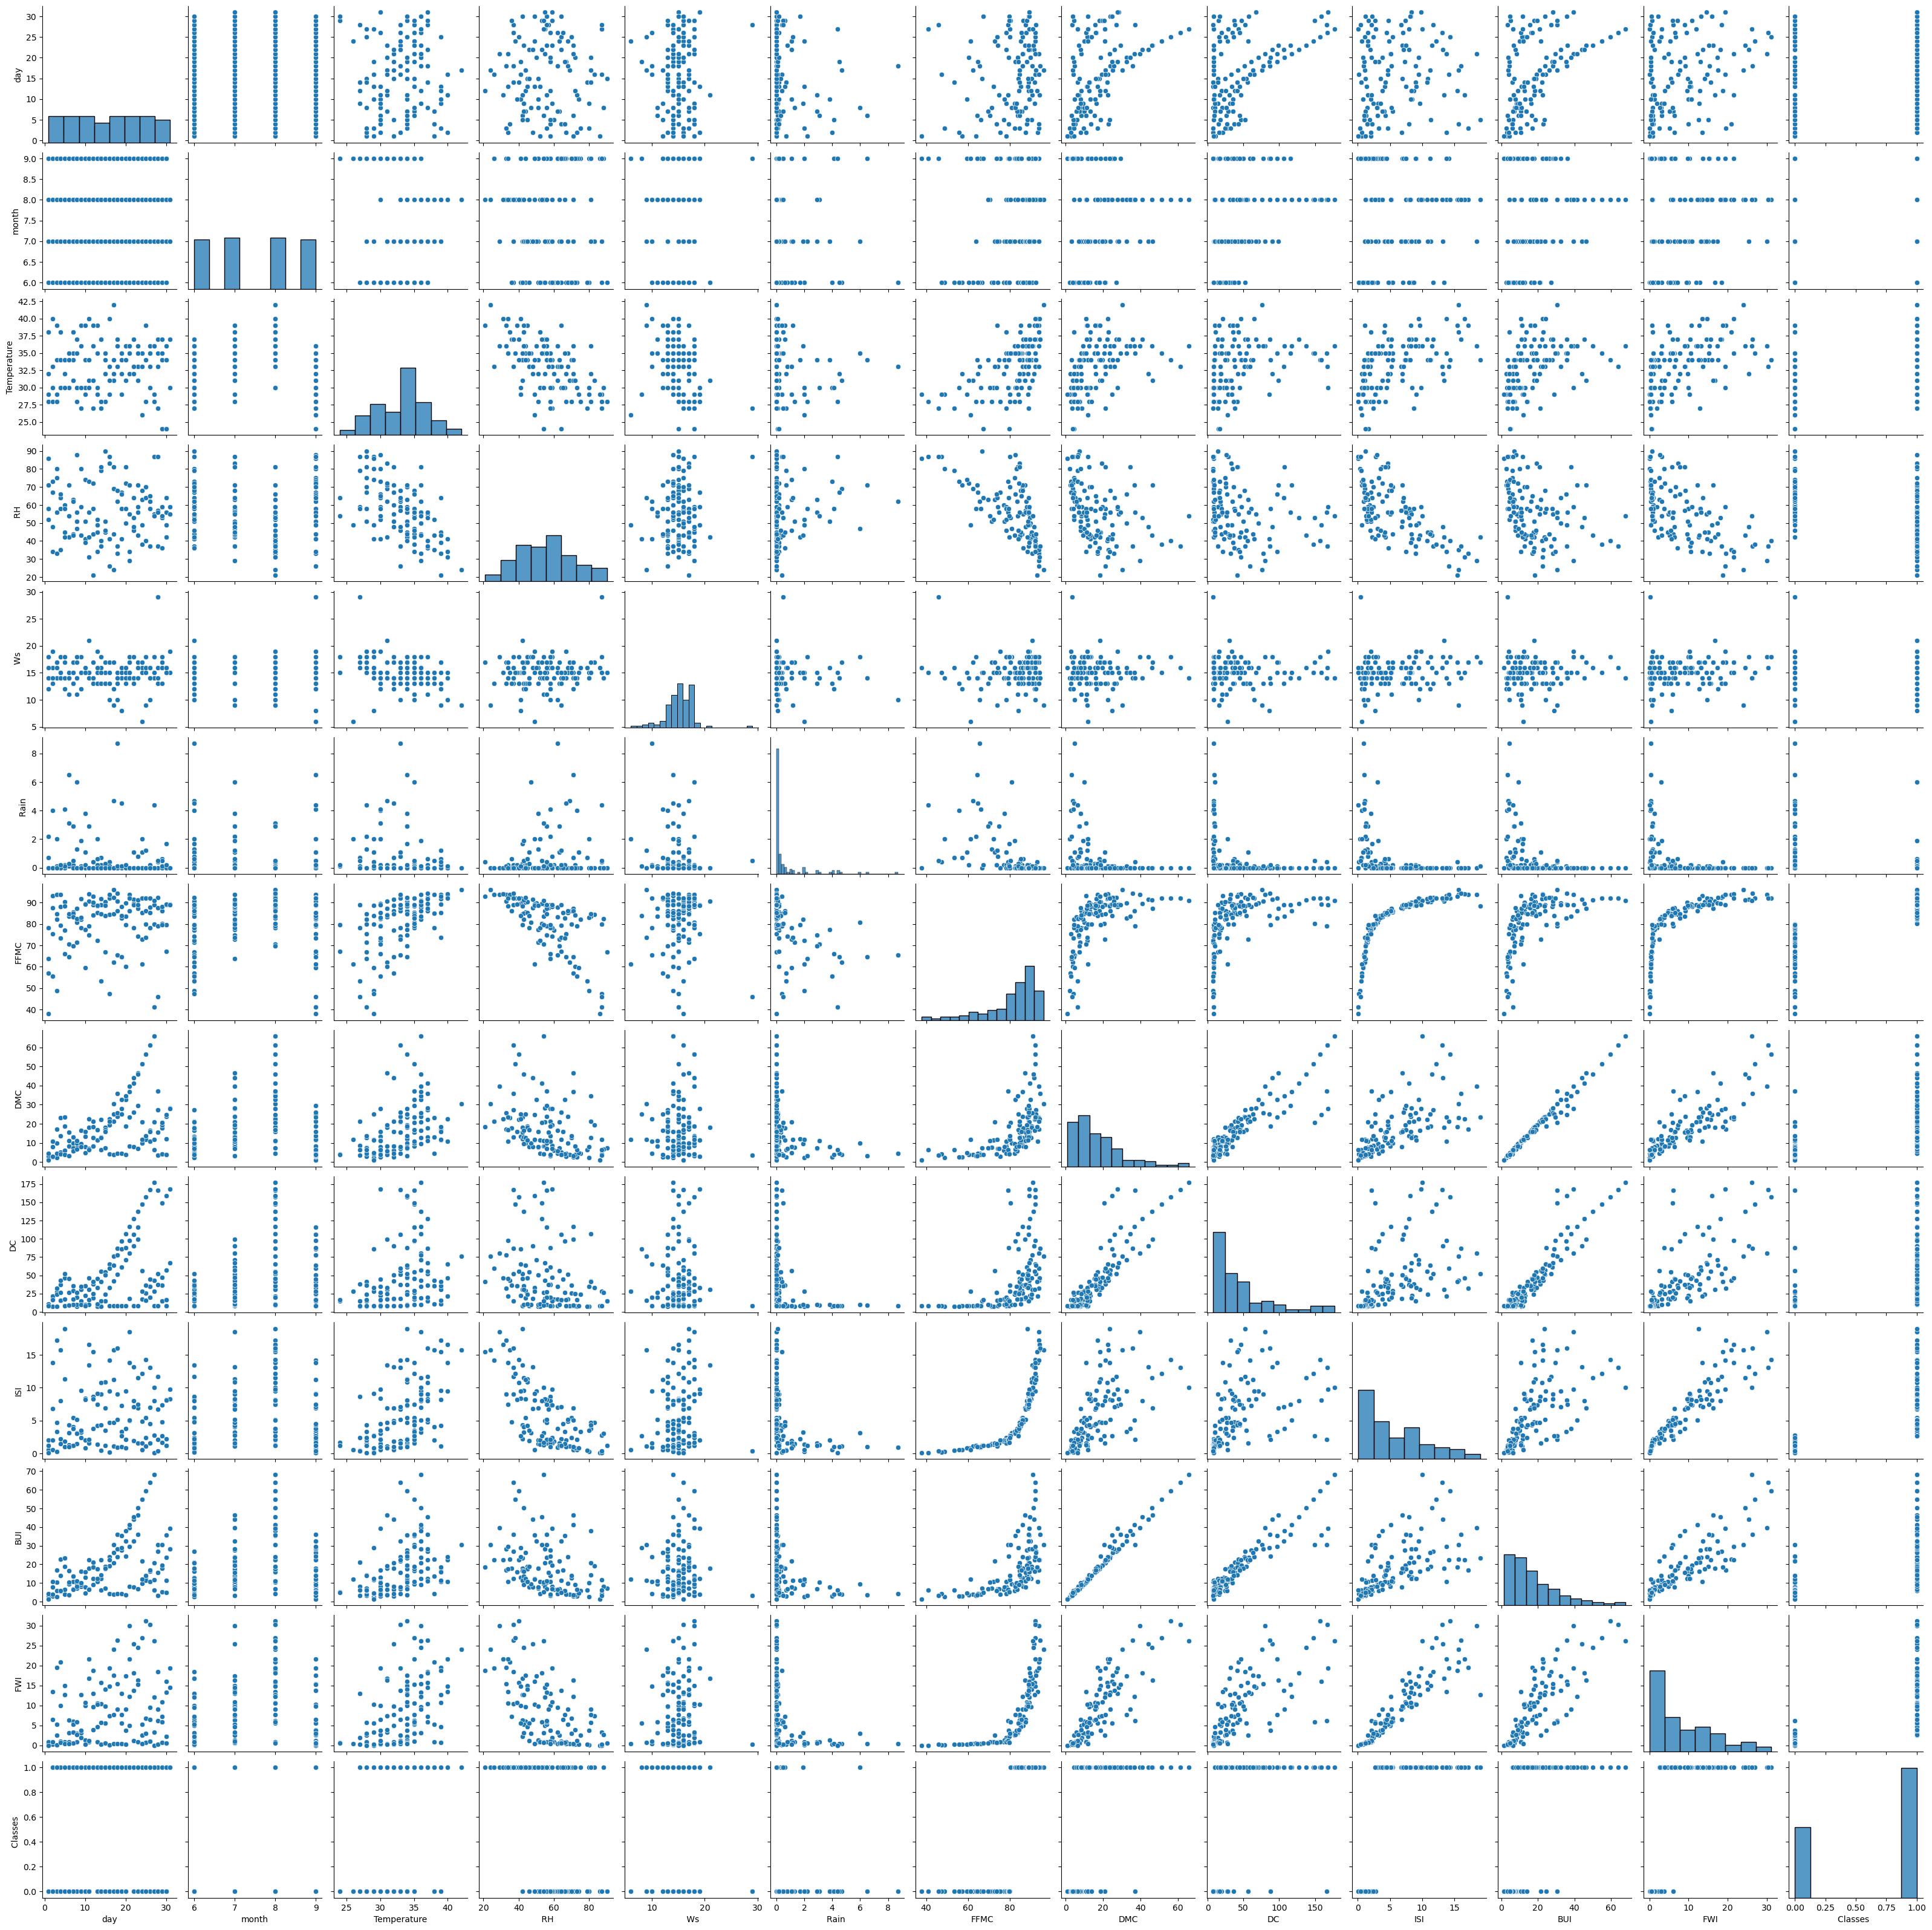

In [89]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly Ash (component 3)(kg in a m^3 mixture),-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water (component 4)(kg in a m^3 mixture),-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer (component 5)(kg in a m^3 mixture),0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age (day),0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
"Concrete compressive strength(MPa, megapascals)",0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [110]:
def traditional_linear_regression(X_train, y_train, X_test):
    """
    Compute linear regression parameters using traditional mathematical formulae
    
    Parameters:
    X_train : array-like, training input features
    y_train : array-like, training target variable
    X_test : array-like, testing input features
    
    Returns:
    dict containing regression parameters and test predictions
    """
    # Compute means
    x_mean = np.mean(X_train)
    y_mean = np.mean(y_train)
    
    # Compute slope (beta)
    numerator = np.sum((X_train - x_mean) * (y_train - y_mean))
    denominator = np.sum((X_train - x_mean)**2)
    
    # Regression parameters
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    
    # Predictions for test set
    y_pred_test = slope * X_test + intercept
    
    # Training set predictions for R-squared calculation
    y_pred_train = slope * X_train + intercept
    
    # R-squared calculation
    ss_total = np.sum((y_train - y_mean)**2)
    ss_residual = np.sum((y_train - y_pred_train)**2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_squared,
        'predictions': y_pred_test
    }

In [111]:
def regression_analysis(X, y):
    """
    Perform comprehensive regression analysis
    
    Parameters:
    X : array-like, input features
    y : array-like, target variable
    
    Returns:
    Comparison of traditional and scikit-learn regression methods
    """
    # Reshape X for sklearn
    X_reshaped = X.reshape(-1, 1)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_reshaped = X_train.reshape(-1, 1)
    X_test_reshaped = X_test.reshape(-1, 1)
    
    # Traditional Method
    traditional_results = traditional_linear_regression(X_train, y_train, X_test)
    traditional_pred = traditional_results['predictions']
    
    # Scikit-learn Method
    sklearn_model = LinearRegression()
    sklearn_model.fit(X_train_reshaped, y_train)
    sklearn_pred = sklearn_model.predict(X_test_reshaped)
    
    # Metrics function
    def print_metrics(y_true, y_pred, method_name):
        print(f"\n{method_name} Regression Metrics:")
        print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred):.4f}")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
        print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred):.4f}")
        print(f"R-squared: {r2_score(y_true, y_pred):.4f}")
        print(f"Explained Variance Score: {explained_variance_score(y_true, y_pred):.4f}")
    
    # Print metrics
    print_metrics(y_test, traditional_pred, "Traditional")
    print_metrics(y_test, sklearn_pred, "Scikit-learn")
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Scatter Plot with Regression Lines
    plt.subplot(131)
    plt.scatter(X, y, alpha=0.5, label='Data Points')
    plt.title('ISI vs FWI Scatter Plot')
    plt.xlabel('ISI')
    plt.ylabel('FWI')
    
    # Traditional Regression Line
    plt.plot(X, traditional_results['slope'] * X + traditional_results['intercept'], 
             color='red', label='Traditional Regression')
    
    # Scikit-learn Regression Line
    plt.plot(X, sklearn_model.coef_[0] * X + sklearn_model.intercept_, 
             color='green', label='Scikit-learn Regression')
    plt.legend()
    
    # Residual Plot - Traditional Method
    plt.subplot(132)
    residuals = y_test - traditional_pred
    plt.scatter(traditional_pred, residuals)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    
    # Actual vs Predicted Plot
    plt.subplot(133)
    plt.scatter(y_test, traditional_pred, label='Traditional')
    plt.scatter(y_test, sklearn_pred, label='Scikit-learn', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted')
    plt.xlabel('Actual FWI')
    plt.ylabel('Predicted FWI')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Regression Equations
    print("\nRegression Equations:")
    print(f"Traditional Method: FWI = {traditional_results['slope']:.4f} * ISI + {traditional_results['intercept']:.4f}")
    print(f"Scikit-learn Method: FWI = {sklearn_model.coef_[0]:.4f} * ISI + {sklearn_model.intercept_:.4f}")
    
    return traditional_results, sklearn_model


Traditional Regression Metrics:
Mean Squared Error: 5.6036
Root Mean Squared Error: 2.3672
Mean Absolute Error: 1.6248
R-squared: 0.8588
Explained Variance Score: 0.8729

Scikit-learn Regression Metrics:
Mean Squared Error: 5.6036
Root Mean Squared Error: 2.3672
Mean Absolute Error: 1.6248
R-squared: 0.8588
Explained Variance Score: 0.8729


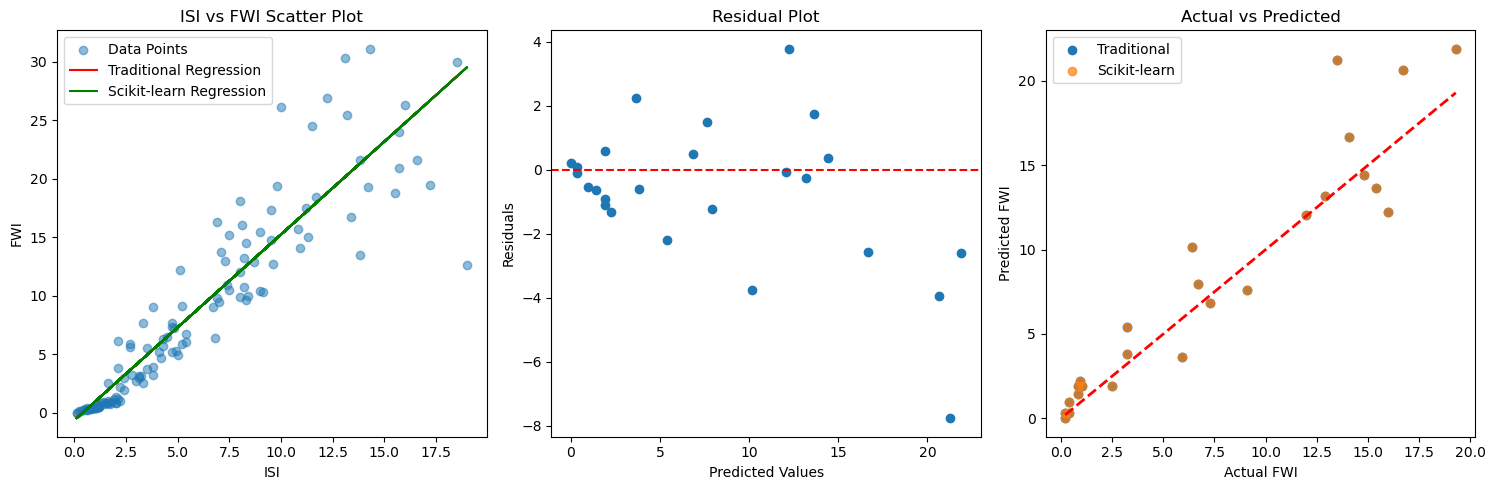


Regression Equations:
Traditional Method: FWI = 1.5876 * ISI + -0.6358
Scikit-learn Method: FWI = 1.5876 * ISI + -0.6358


({'slope': 1.5876021082651717,
  'intercept': -0.6358274058396169,
  'r_squared': 0.8340042763236732,
  'predictions': array([ 9.51774702e-01,  6.82590250e+00,  7.61970356e+00,  3.65069829e+00,
          2.22185639e+00,  1.90433597e+00,  2.12730817e+01,  2.19081225e+01,
          1.01598669e+01,  1.90433597e+00,  1.90433597e+00, -7.86562534e-04,
          2.06380408e+01,  1.22237497e+01,  1.36525916e+01,  1.31763109e+01,
          1.44463926e+01,  3.80945850e+00,  3.16733859e-01,  3.16733859e-01,
          1.20649895e+01,  1.66690356e+01,  1.42805533e+00,  5.39706061e+00,
          7.93722398e+00])},
 LinearRegression())

In [112]:
 # Extracting ISI and FWI
X = df['ISI'].values
y = df['FWI'].values
    
# Perform regression analysis
regression_analysis(X, y)

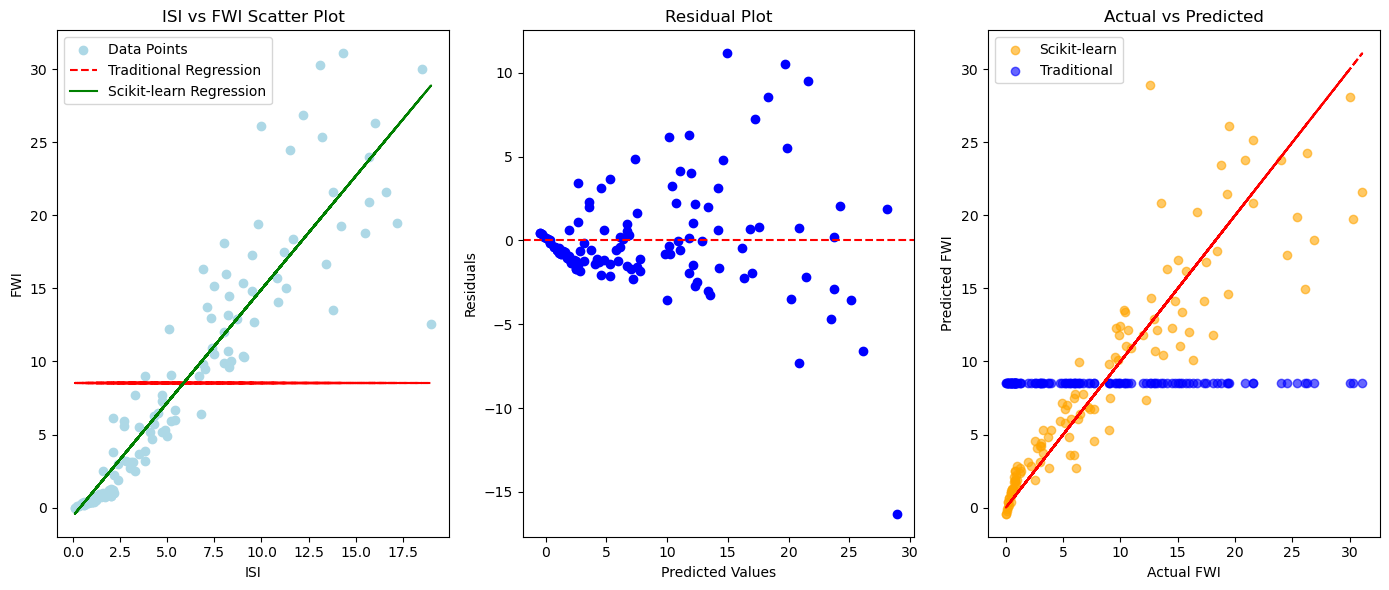

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example data (replace this with your actual data)
X = df['ISI'].values.reshape(-1,1)
y = df['FWI'].values

# Traditional Regression (Manual)
X_mean = np.mean(X)
y_mean = np.mean(y)
slope = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
intercept = y_mean - slope * X_mean
y_pred_traditional = slope * X + intercept

# Scikit-learn Regression
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)

# Create the plot
plt.figure(figsize=(14, 6))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(X, y, label="Data Points", color='lightblue')
plt.plot(X, y_pred_traditional, label="Traditional Regression", color='red', linestyle='--')
plt.plot(X, y_pred_sklearn, label="Scikit-learn Regression", color='green', linestyle='-')
plt.title("ISI vs FWI Scatter Plot")
plt.xlabel("ISI")
plt.ylabel("FWI")
plt.legend()

# Residual plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_sklearn, y - y_pred_sklearn, label="Residuals", color='blue')
plt.axhline(0, color='red', linestyle='--')  # Red dashed line at y=0
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Actual vs Predicted plot
plt.subplot(1, 3, 3)
plt.scatter(y, y_pred_sklearn, label="Scikit-learn", color='orange', alpha=0.6)
plt.scatter(y, y_pred_traditional, label="Traditional", color='blue', alpha=0.6)
plt.plot(y, y, color='red', linestyle='--')  # Red dashed line
plt.title("Actual vs Predicted")
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.legend()

plt.tight_layout()
plt.show()